In [18]:
import os
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import TensorBoard
from keras.optimizers import SGD
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
num_classes = 10
img_rows, img_cols = 28, 28

In [3]:
# load mnist data
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    print(x_train.shape, x_test.shape)
    
    return x_train, y_train, x_test, y_test

In [4]:
# show mnist data
def show_mnist(x_train):
    
    fig = plt.figure(figsize=(5, 5))
    
    for i in range(100):
        ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
        ax.imshow(x_train[i].reshape((28, 28)), cmap='gray')

In [6]:
#preprocess image and label
def preprocessing(x_train, y_train, x_test, y_test):
    # reshape data: (x, 28, 28) -> (x, 28*28)
    x_train = x_train.reshape(x_train.shape[0], img_rows*img_cols)
    x_test = x_test.reshape(x_test.shape[0], img_rows*img_cols)
    print(x_train.shape, x_test.shape)

    # convert
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255

    # convert class vector to one-hot encoded vector
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    
    return x_train, y_train, x_test, y_test

In [7]:
# build neural network architecture
def build_model(shape):
    model = Sequential()
    model.add(Dense(24, input_shape=(shape, )))
    model.add(Activation('sigmoid'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.summary()
    
    return model

In [8]:
x_train, y_train, x_test, y_test = load_data()

11493376/11490434 [==============================] - 9s 1us/step
(60000, 28, 28) (10000, 28, 28)


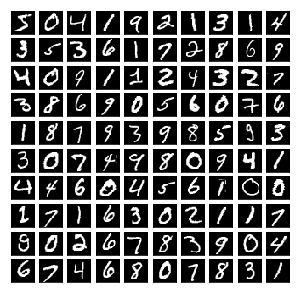

In [9]:
show_mnist(x_train)

In [10]:
x_train, y_train, x_test, y_test = preprocessing(x_train, y_train, x_test, y_test)

(60000, 784) (10000, 784)


In [19]:
model = build_model(x_train.shape[1])
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 24)                18840     
_________________________________________________________________
activation_11 (Activation)   (None, 24)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                250       
_________________________________________________________________
activation_12 (Activation)   (None, 10)                0         
Total params: 19,090
Trainable params: 19,090
Non-trainable params: 0
_________________________________________________________________


In [12]:
# TensorBoard
os.makedirs('logs', exist_ok=True)
tb_cb = TensorBoard(log_dir='./logs', histogram_freq=1, write_images=True)

In [13]:
# Learning
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10,
                batch_size=128, callbacks=[tb_cb], verbose=1, shuffle=True)

W0625 17:28:05.978929  7388 deprecation_wrapper.py:119] From C:\Users\Owner\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0625 17:28:05.994953  7388 deprecation_wrapper.py:119] From C:\Users\Owner\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 60000 samples, validate on 10000 samples


W0625 17:28:06.997925  7388 deprecation_wrapper.py:119] From C:\Users\Owner\Anaconda3\lib\site-packages\keras\callbacks.py:796: The name tf.summary.histogram is deprecated. Please use tf.compat.v1.summary.histogram instead.

W0625 17:28:07.050975  7388 deprecation_wrapper.py:119] From C:\Users\Owner\Anaconda3\lib\site-packages\keras\callbacks.py:840: The name tf.summary.image is deprecated. Please use tf.compat.v1.summary.image instead.

W0625 17:28:07.081019  7388 deprecation_wrapper.py:119] From C:\Users\Owner\Anaconda3\lib\site-packages\keras\callbacks.py:850: The name tf.summary.merge_all is deprecated. Please use tf.compat.v1.summary.merge_all instead.

W0625 17:28:07.084998  7388 deprecation_wrapper.py:119] From C:\Users\Owner\Anaconda3\lib\site-packages\keras\callbacks.py:853: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.



Epoch 1/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0916 - acc: 0.0730 - val_loss: 0.0915 - val_acc: 0.0700
Epoch 2/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0912 - acc: 0.0864 - val_loss: 0.0911 - val_acc: 0.0849
Epoch 3/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0908 - acc: 0.1025 - val_loss: 0.0907 - val_acc: 0.1027
Epoch 4/10
60000/60000 [==============================] - 1s 11us/step - loss: 0.0905 - acc: 0.1172 - val_loss: 0.0904 - val_acc: 0.1169
Epoch 5/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0902 - acc: 0.1323 - val_loss: 0.0901 - val_acc: 0.1308
Epoch 6/10
60000/60000 [==============================] - 1s 12us/step - loss: 0.0899 - acc: 0.1446 - val_loss: 0.0898 - val_acc: 0.1451
Epoch 7/10
60000/60000 [==============================] - 1s 14us/step - loss: 0.0896 - acc: 0.1572 - val_loss: 0.0895 - val_acc: 0.1608
Epoch 8/10
60000/60000 [=================

In [ ]:
# export model
model.save('model.h5')